In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advt.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df=df.drop(df.columns[0], axis=1)

In [5]:
df.shape

(200, 4)

In [6]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All columns have float datatype

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null values.

(array([ 45., 113.,  42.]),
 array([ 1.6       , 10.06666667, 18.53333333, 27.        ]),
 <BarContainer object of 3 artists>)

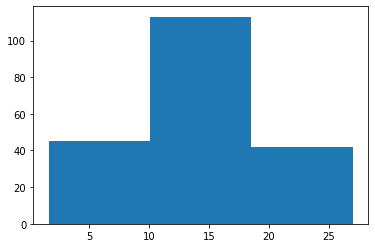

In [8]:
plt.hist(df['sales'],bins=3)

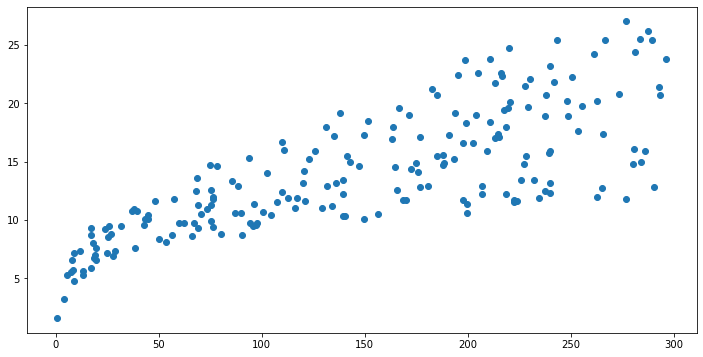

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(x='TV',y='sales',data=df)
plt.show()

With growth in TV ads sales increase

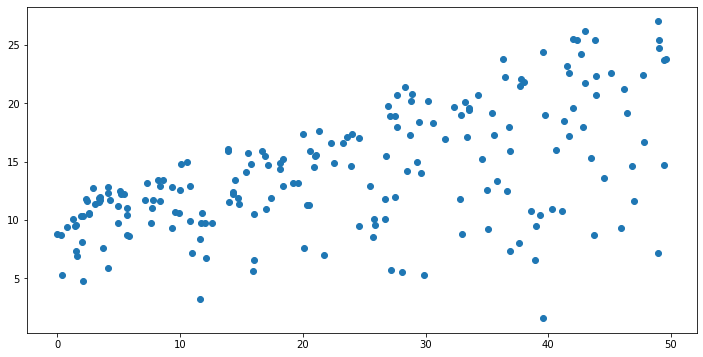

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(x='radio',y='sales',data=df)
plt.show()

Radio ads and newspaper ads show linear relationship with sales

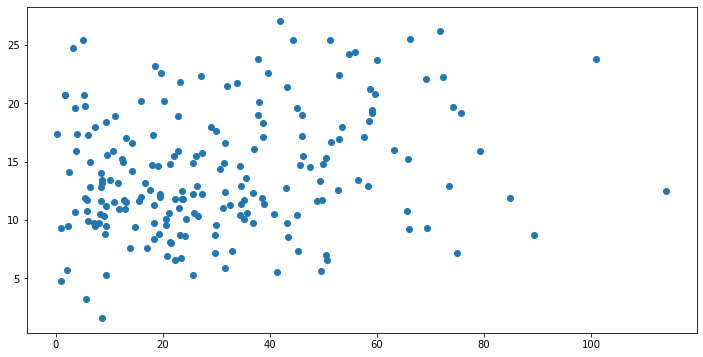

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(x='newspaper',y='sales',data=df)
plt.show()

<Figure size 864x432 with 0 Axes>

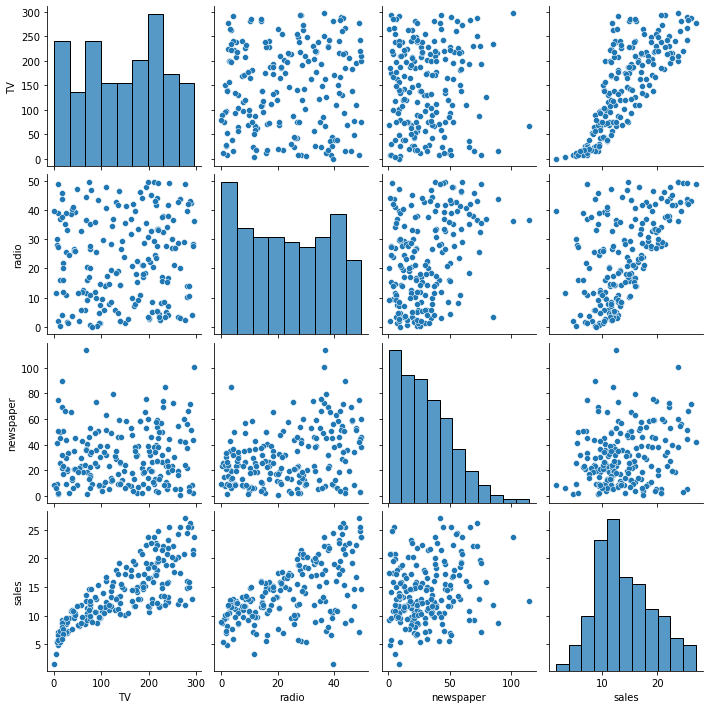

In [12]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show()

In [14]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
print(np.where(df['radio']==0))

(array([127], dtype=int64),)


<AxesSubplot:>

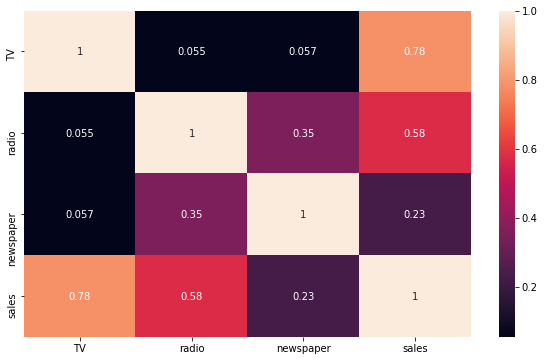

In [16]:
plt.figure(figsize=(10,6))                        #figure size
sns.heatmap(df.corr(),annot=True)

TV shows good relation with sales as compared to radio followed by newspaper.
More TV ads fetch mores sales as compared to rest two channels.

In [17]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

not much of skewness is present

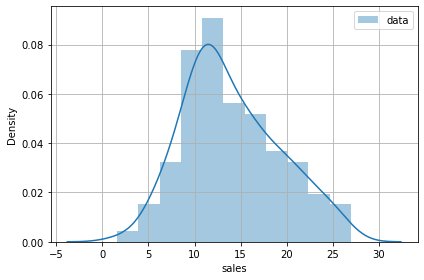

In [18]:

sns.distplot(df['sales'],kde=True,label='data')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()

In [19]:
x=df.iloc[:,0:3]
y=df['sales']

In [20]:
x.shape

(200, 3)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

# Scaling of Data

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train_std = sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [24]:
lm=LinearRegression()
lm.fit(x_train_std,y_train)
lm.score(x_train_std,y_train)
pred=lm.predict(x_test_std)
print('Error:')

print("Mean absolute error:",mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean square error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score:',r2_score(y_test,pred))

Error:
Mean absolute error: 1.2832517872828586
Mean squared error: 4.000614022849566
Root Mean square error: 2.0001534998218427
r2_score: 0.8489167626332438


In [25]:
kn=KNeighborsRegressor()
kn.fit(x_train_std,y_train)
kn.score(x_train_std,y_train)
pred1=kn.predict(x_test_std)
print('Error:')

print("Mean absolute error:",mean_absolute_error(y_test,pred1))
print('Mean squared error:',mean_squared_error(y_test,pred1))
print('Root Mean square error:',np.sqrt(mean_squared_error(y_test,pred1)))
print('r2_score:',r2_score(y_test,pred1))

Error:
Mean absolute error: 0.8808
Mean squared error: 1.9821440000000001
Root Mean square error: 1.4078863590503319
r2_score: 0.9251443076646055


In [26]:
rf=RandomForestRegressor()
rf.fit(x_train_std,y_train)
rf.score(x_train_std,y_train)
pred2=rf.predict(x_test_std)
print('Error:')

print("Mean absolute error:",mean_absolute_error(y_test,pred2))
print('Mean squared error:',mean_squared_error(y_test,pred2))
print('Root Mean square error:',np.sqrt(mean_squared_error(y_test,pred2)))
print('r2_score:',r2_score(y_test,pred2))

Error:
Mean absolute error: 0.712800000000002
Mean squared error: 0.8044250000000028
Root Mean square error: 0.896897430033113
r2_score: 0.9696208800637593


In [27]:
sv=SVR()
sv.fit(x_train_std,y_train)
sv.score(x_train_std,y_train)
pred4=lm.predict(x_test_std)
print('Error:')

print("Mean absolute error:",mean_absolute_error(y_test,pred4))
print('Mean squared error:',mean_squared_error(y_test,pred4))
print('Root Mean square error:',np.sqrt(mean_squared_error(y_test,pred4)))
print('r2_score:',r2_score(y_test,pred4))

Error:
Mean absolute error: 1.2832517872828586
Mean squared error: 4.000614022849566
Root Mean square error: 2.0001534998218427
r2_score: 0.8489167626332438


In [28]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,x,y,cv=5).mean())

0.9744310585691345


In [29]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.8404415171122854


In [30]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.9085710686189529


In [31]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.8871063495438435


In [32]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameter={'random_state':[20,30,33,37,43],
           'max_depth':[3,5,7,9,10],
          'criterion':["squared_error", "mse", "absolute_error", "poisson"],
           'bootstrap':[True,False],
          'max_features':['auto','sqrt','log2']}

In [35]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [36]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [20, 30, 33, 37, 43]})

In [37]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'auto',
 'random_state': 43}

In [45]:
final_mod=RandomForestRegressor(random_state=43,bootstrap=True,criterion='squared_error',max_depth=9,max_features='auto')
final_mod.fit(x_train,y_train)
predM=final_mod.predict(x_test)
print('Error:')

print("Mean absolute error:",mean_absolute_error(y_test,predM))
print('Mean squared error:',mean_squared_error(y_test,predM))
print('Root Mean square error:',np.sqrt(mean_squared_error(y_test,predM)))
print('r2_score:',r2_score(y_test,predM))

Error:
Mean absolute error: 0.5600325714285698
Mean squared error: 0.636808903229704
Root Mean square error: 0.7980030721931488
r2_score: 0.9759509040026342


In [39]:
p=np.array([230.1,37.8,69.2])
p=p.reshape(1,-1)        #reshaped into 2D data,where -1:Many columns,1:number of rows
p.shape

(1, 3)

In [40]:
final_mod.predict(p)

array([22.1205])

In [41]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [42]:
import joblib
joblib.dump(final_mod,'advt.obj')
mod_from_joblib=joblib.load('advt.obj')

In [43]:
import joblib

In [44]:
mod_from_joblib=joblib.load('advt.obj')
mod_from_joblib.predict(p)

array([22.1205])